Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Datasets

In [7]:
df = pd.read_csv('/content/election_results_2024.csv')
df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [9]:
df.shape

(543, 8)

In [13]:
df.isnull().sum()

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    1
Trailing Party        1
Margin                0
Status                0
dtype: int64

In [14]:
df.columns

Index(['Constituency', 'Const. No.', 'Leading Candidate', 'Leading Party',
       'Trailing Candidate', 'Trailing Party', 'Margin', 'Status'],
      dtype='object')

Party with Highest and Lowest Margin of Victory

In [16]:
party_votes = df.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
df['Margin'] = pd.to_numeric(df['Margin'], errors='coerce')

# Party with highest and lowest margin of victory
highest_margin = df.loc[df['Margin'].idxmax()]
lowest_margin = df.loc[df['Margin'].idxmin()]

Plot Number of seats won by each Party:

<ipython-input-17-3fd152b8f44d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seats_won.index, y=seats_won.values, palette='viridis')


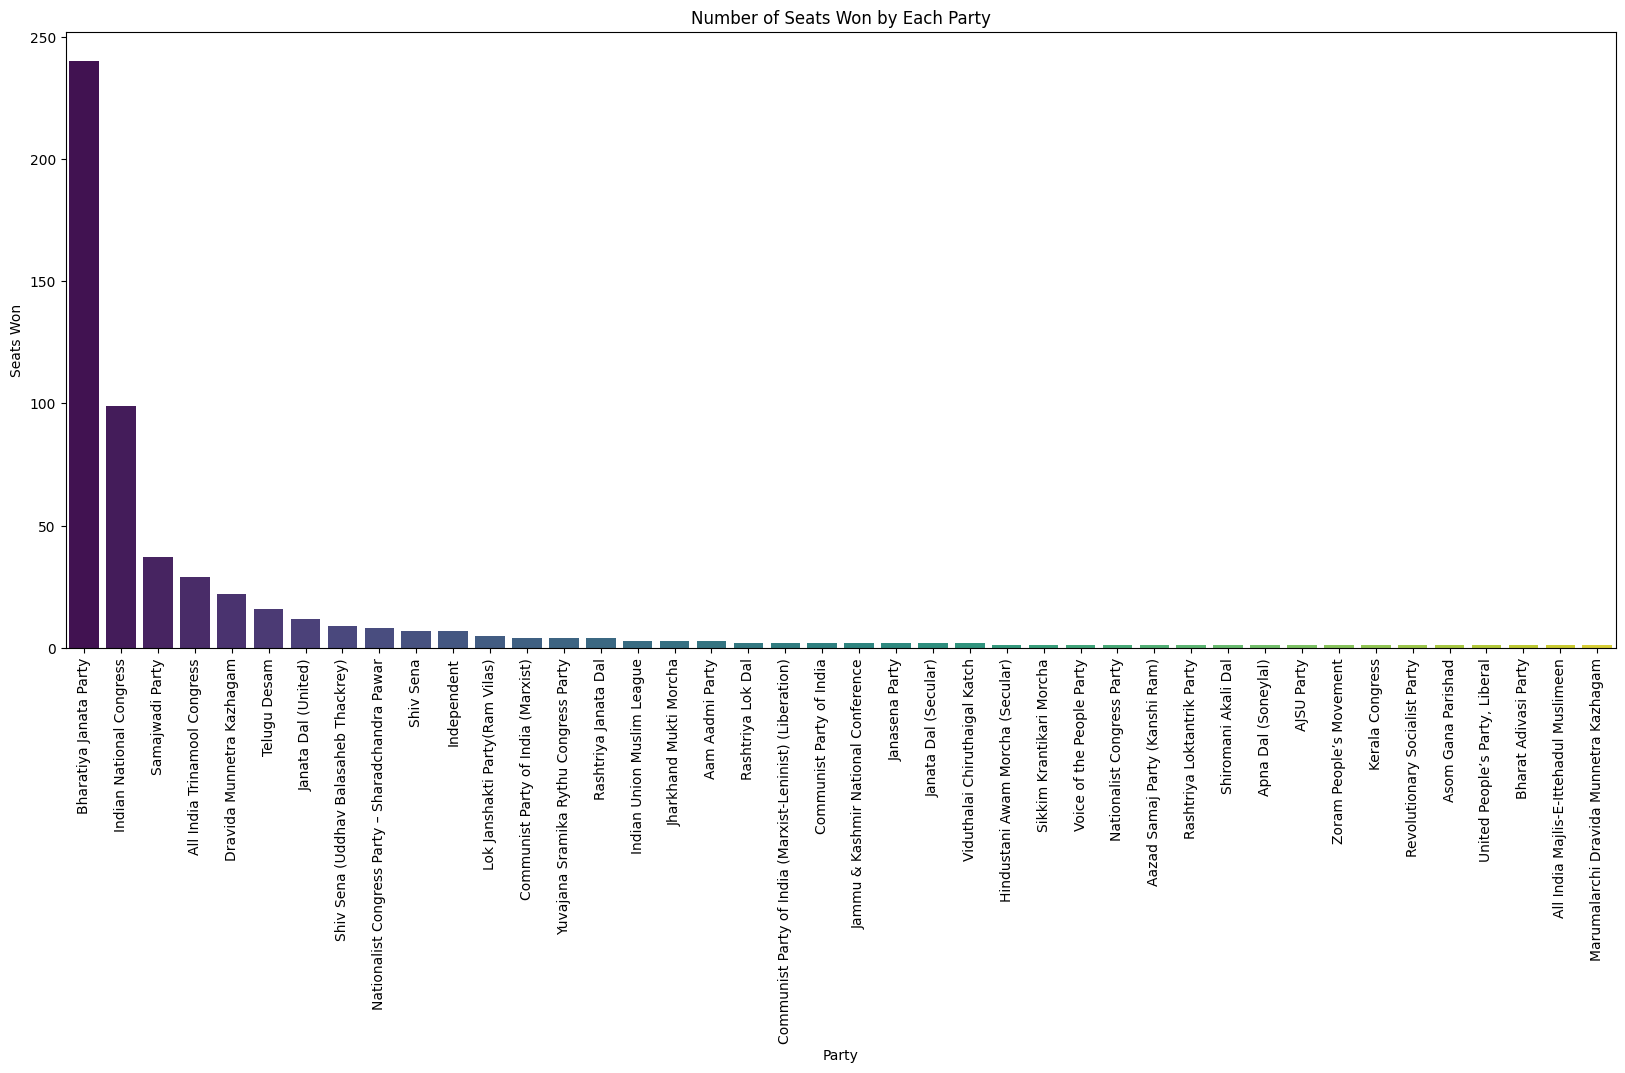

In [17]:
leading_party_highest_votes = party_votes.idxmax()
leading_party_lowest_votes = party_votes.idxmin()
# Number of seats won by each party
seats_won = df['Leading Party'].value_counts()
# Plot number of seats won by each party
plt.figure(figsize=(20, 8))
sns.barplot(x=seats_won.index, y=seats_won.values, palette='viridis')
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=90)
plt.show()

Votes for Rahul Gandhi, Modi and Amit Shah

In [23]:
rahul_entries = df[df['Leading Candidate'] == 'RAHUL GANDHI']
modi_entries = df[df['Leading Candidate'] == 'NARENDRA MODI']
amit_entries = df[df['Leading Candidate'] == 'AMIT SHAH']

# Get the votes for Rahul Gandhi, Narendra Modi, and Amit Shah
rahul_votes = rahul_entries['Margin'].values
modi_votes = modi_entries['Margin'].values[0] if not modi_entries.empty else 0
amit_votes = amit_entries['Margin'].values[0] if not amit_entries.empty else 0

In [24]:
# Get the original constituency names for Rahul Gandhi
rahul_constituencies = list(rahul_entries['Constituency'])

# Get the original constituency name for Narendra Modi
modi_constituency = modi_entries['Constituency'].values[0] if not modi_entries.empty else "Modi Constituency"

# Get the original constituency name for Amit Shah
amit_constituency = amit_entries['Constituency'].values[0] if not amit_entries.empty else "Amit Shah Constituency"


In [25]:
# Combine the data
data_to_plot = pd.DataFrame({
    'Candidate': ['Rahul Gandhi'] * len(rahul_votes) + ['Narendra Modi', 'Amit Shah'],
    'Constituency': rahul_constituencies + [modi_constituency, amit_constituency],
    'Votes': list(rahul_votes) + [modi_votes, amit_votes]
})

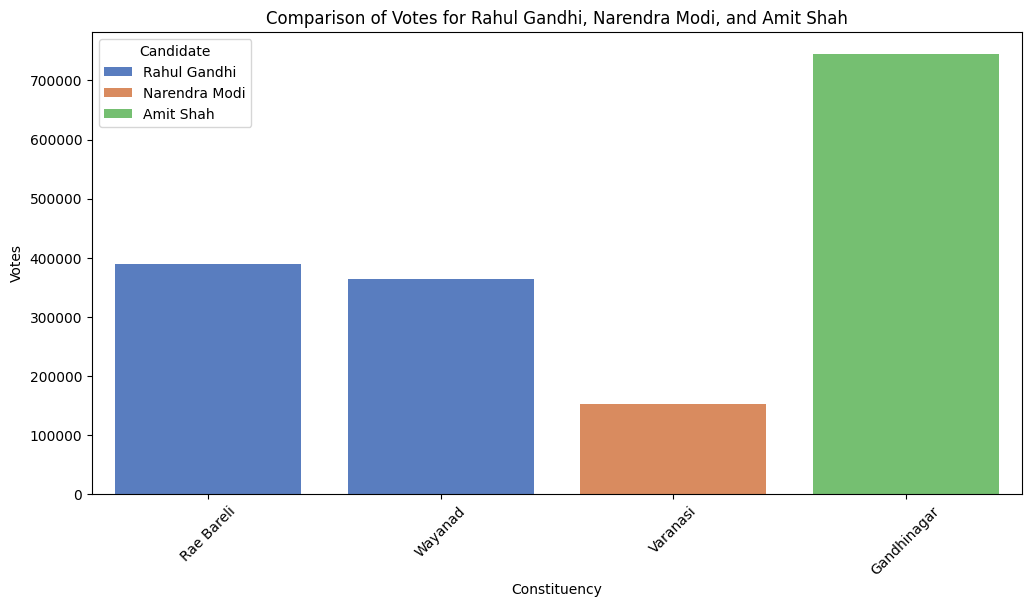

In [26]:
# Plot the comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=data_to_plot, x='Constituency', y='Votes', hue='Candidate', palette='muted')
plt.title('Comparison of Votes for Rahul Gandhi, Narendra Modi, and Amit Shah')
plt.xlabel('Constituency')
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.show()

Highest and lowest Victory Candidate

In [27]:
highest_margin_entry = df.loc[df['Margin'].idxmax()]
lowest_margin_entry = df.loc[df['Margin'].idxmin()]

# Combine the data
data_to_plot = pd.DataFrame({
    'Candidate': [highest_margin_entry['Leading Candidate'], lowest_margin_entry['Leading Candidate']],
    'Party': [highest_margin_entry['Leading Party'], lowest_margin_entry['Leading Party']],
    'Margin': [highest_margin_entry['Margin'], lowest_margin_entry['Margin']]
})


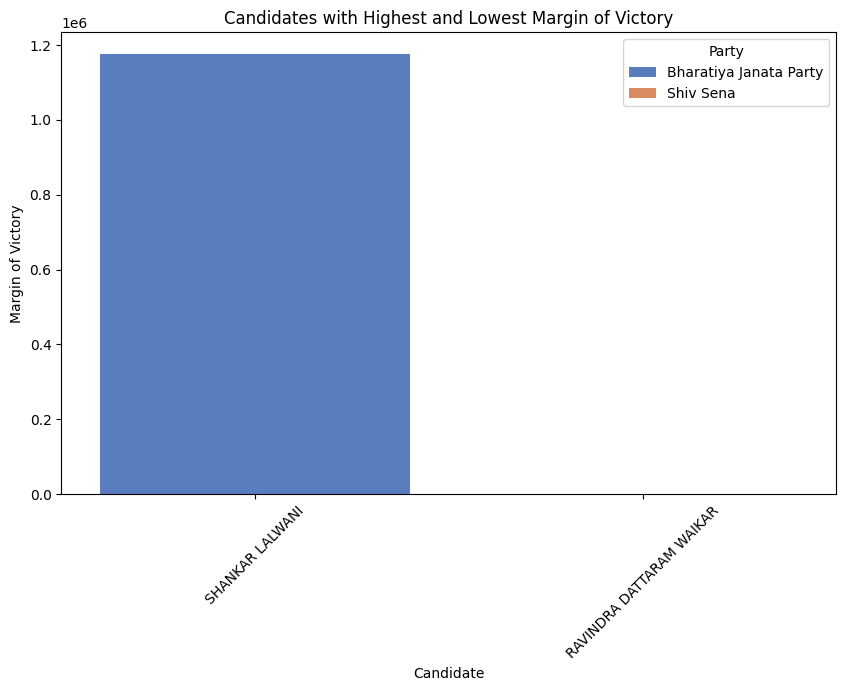

In [28]:
# Plot the comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=data_to_plot, x='Candidate', y='Margin', hue='Party', palette='muted')
plt.title('Candidates with Highest and Lowest Margin of Victory')
plt.xlabel('Candidate')
plt.ylabel('Margin of Victory')
plt.xticks(rotation=45)
plt.show()

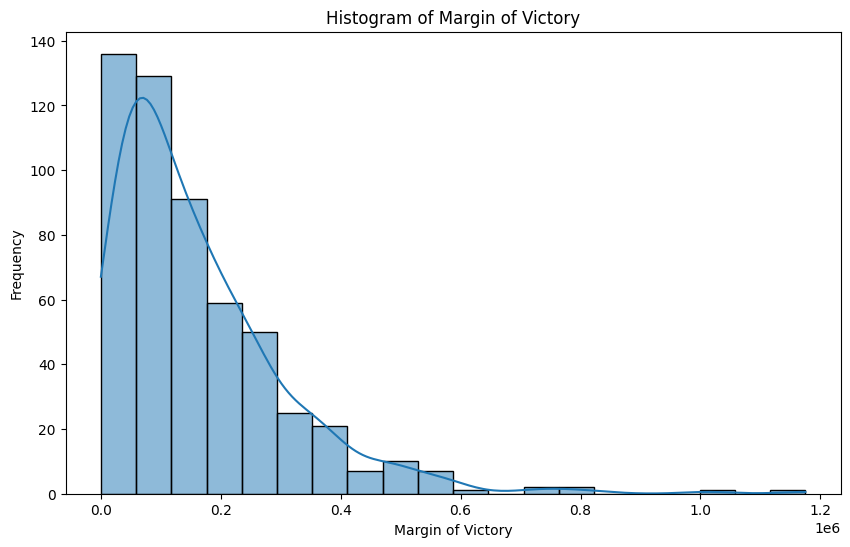

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Margin'], bins=20, kde=True)
plt.title('Histogram of Margin of Victory')
plt.xlabel('Margin of Victory')
plt.ylabel('Frequency')
plt.show()

VOTES DISTRIBUTION BY Each Party

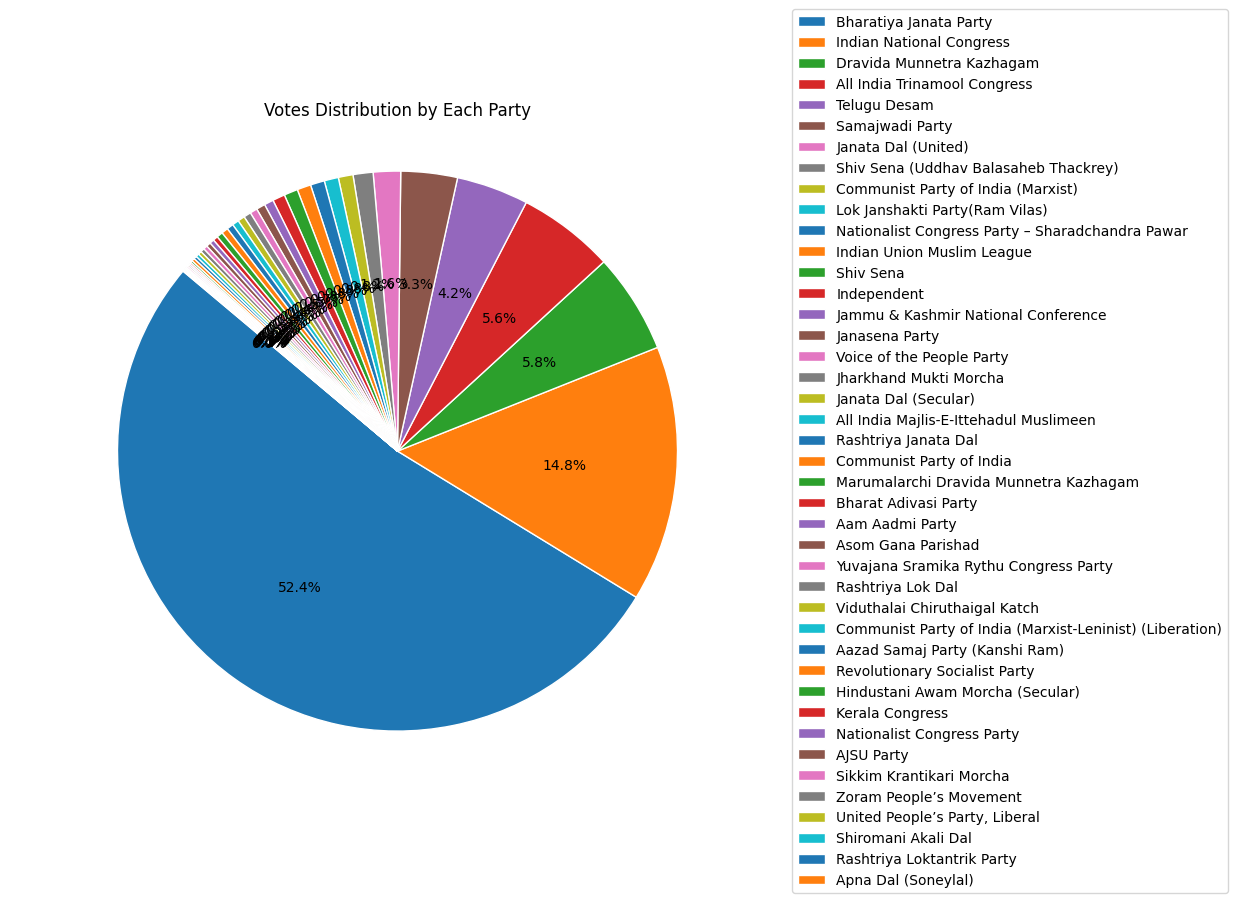

In [31]:
party_votes = df.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(party_votes, labels=None, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='w'))
plt.title('Votes Distribution by Each Party', pad=20)
plt.axis('equal')

plt.legend(labels=party_votes.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')


plt.show()

**Top 10 trailing party by VOTE**


In [33]:
trailing_party_votes = df.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_seats = df['Trailing Party'].value_counts()

<ipython-input-36-566803a49806>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailing_party_votes.index[:10], y=trailing_party_votes.values[:10], palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Indian National Congress'),
  Text(1, 0, 'Bharatiya Janata Party'),
  Text(2, 0, 'All India Anna Dravida Munnetra Kazhagam'),
  Text(3, 0, 'Yuvajana Sramika Rythu Congress Party'),
  Text(4, 0, 'Communist Party of India (Marxist)'),
  Text(5, 0, 'Samajwadi Party'),
  Text(6, 0, 'Biju Janata Dal'),
  Text(7, 0, 'Rashtriya Janata Dal'),
  Text(8, 0, 'Bahujan Samaj Party'),
  Text(9, 0, 'Aam Aadmi Party')])

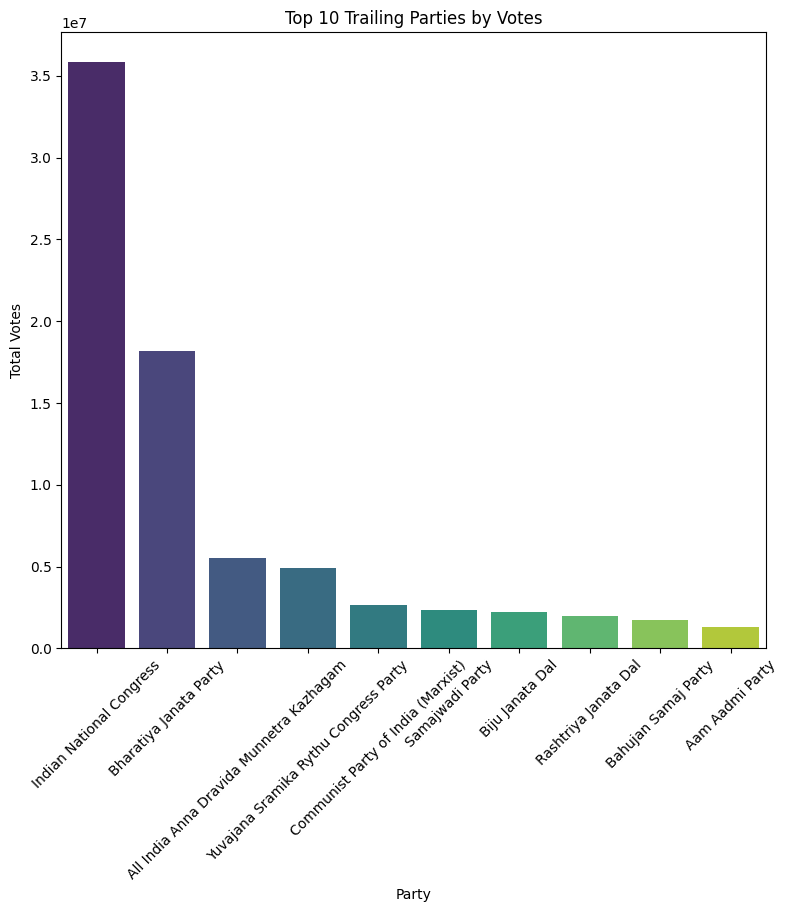

In [36]:
plt.figure(figsize=(20,8))

# Plot votes distribution by trailing party
plt.subplot(1, 2, 1)
sns.barplot(x=trailing_party_votes.index[:10], y=trailing_party_votes.values[:10], palette='viridis')
plt.title('Top 10 Trailing Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)

**Top 10 trailing party by SEAT**

<ipython-input-35-7763519eab1a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailing_party_seats.index[:10], y=trailing_party_seats.values[:10], palette='viridis')


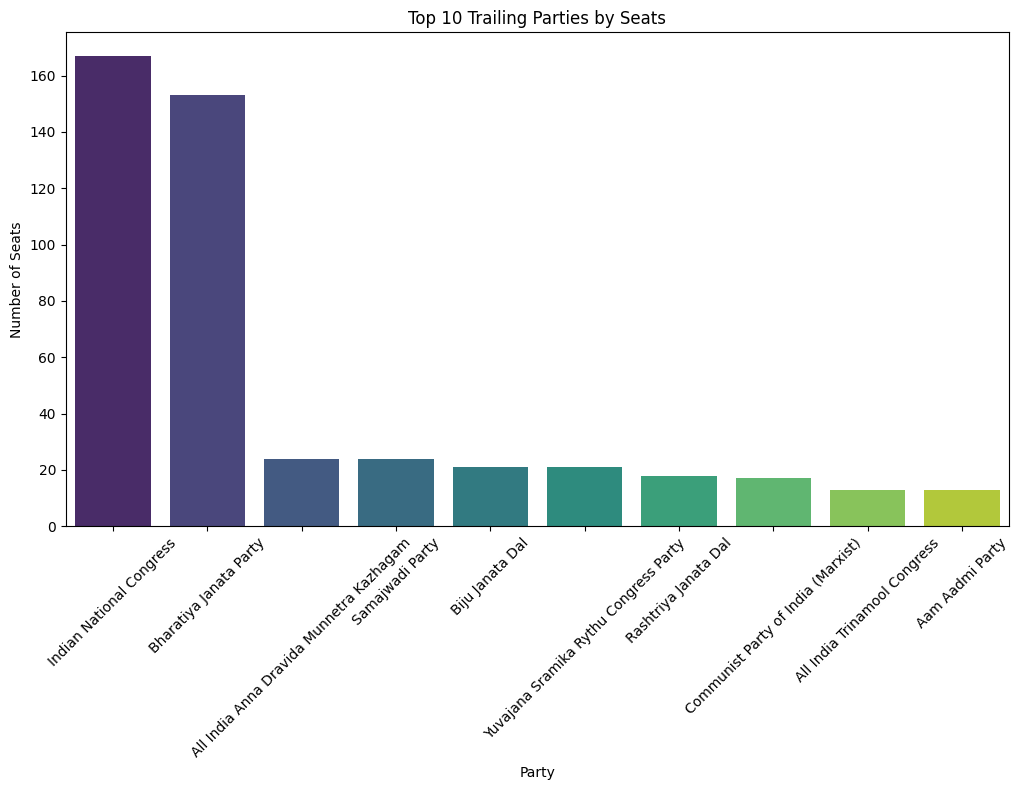

In [35]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 2)
sns.barplot(x=trailing_party_seats.index[:10], y=trailing_party_seats.values[:10], palette='viridis')
plt.title('Top 10 Trailing Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()